# Desafío Clase 35 - Análisis Bivariado

A partir de lo abarcado en el anterior desafío, me interesa ampliar sobre algunas de las preguntas formuladas anteriormente (es posible que algo del análisis aquí expuesto corresponda al univariado) y plantear otras.

Orientaré el análisis en este desafío a partir de las siguientes interrogantes:

* ¿Cómo se comportan las ventas, según sucursal y rubro? ¿Hay rubros más presentes en algunas sucursales y menos en otras?
* ¿Existe correlación entre el precio del petróleo y la cantidad de ventas a lo largo del tiempo?
* Siendo, por mucho, el rubro GROCERY I el más importante, ¿existe correlación entre su valor y la suma de los demás?
* La variable *onpromotion* indica cuántos artículos se encuentran en promoción en un determinado rubro, en una sucursal, en un día. ¿Es cierto que, cuanto mayor sea esta variable, más ventas habrá?
* ¿Qué información puede aportar una tabla de correlación entre las variables cuantitativas?
* ¿Cómo varían ventas y promociones a lo largo de un año?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# armo los dataframes con las diferentes tablas del dataset.

sucursales = pd.read_csv('E:\DESCARGAS\Archivo_de_apuntes_recursos_Coder_(no_borrar)\Data Science_Proyecto Final\store-sales-time-series-forecasting\stores.csv')
train = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/train.csv')
oil = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/oil.csv')
tx = pd.read_csv('E:/DESCARGAS/Archivo_de_apuntes_recursos_Coder_(no_borrar)/Data Science_Proyecto Final/store-sales-time-series-forecasting/transactions.csv')


## ¿Cómo se comportan las ventas, según sucursal y rubro? ¿Hay rubros más presentes en algunas sucursales y menos en otras?

In [22]:
sales_per_str = train.groupby(by=['store_nbr'],as_index=False).sum()
sales_per_str = sales_per_str.drop(columns=['onpromotion','id'])
sales_per_str['store_nbr'] = sales_per_str['store_nbr'].apply(str)

sales_per_fam = train.groupby(by=['family'],as_index=False).sum()
sales_per_fam = sales_per_fam.drop(columns=['onpromotion','id'])

sales_per_str.head()

,store_nbr,sales
0,1,1.414501e+07
1,2,2.155739e+07
2,3,5.048191e+07
3,4,1.890970e+07
4,5,1.559240e+07


[None]

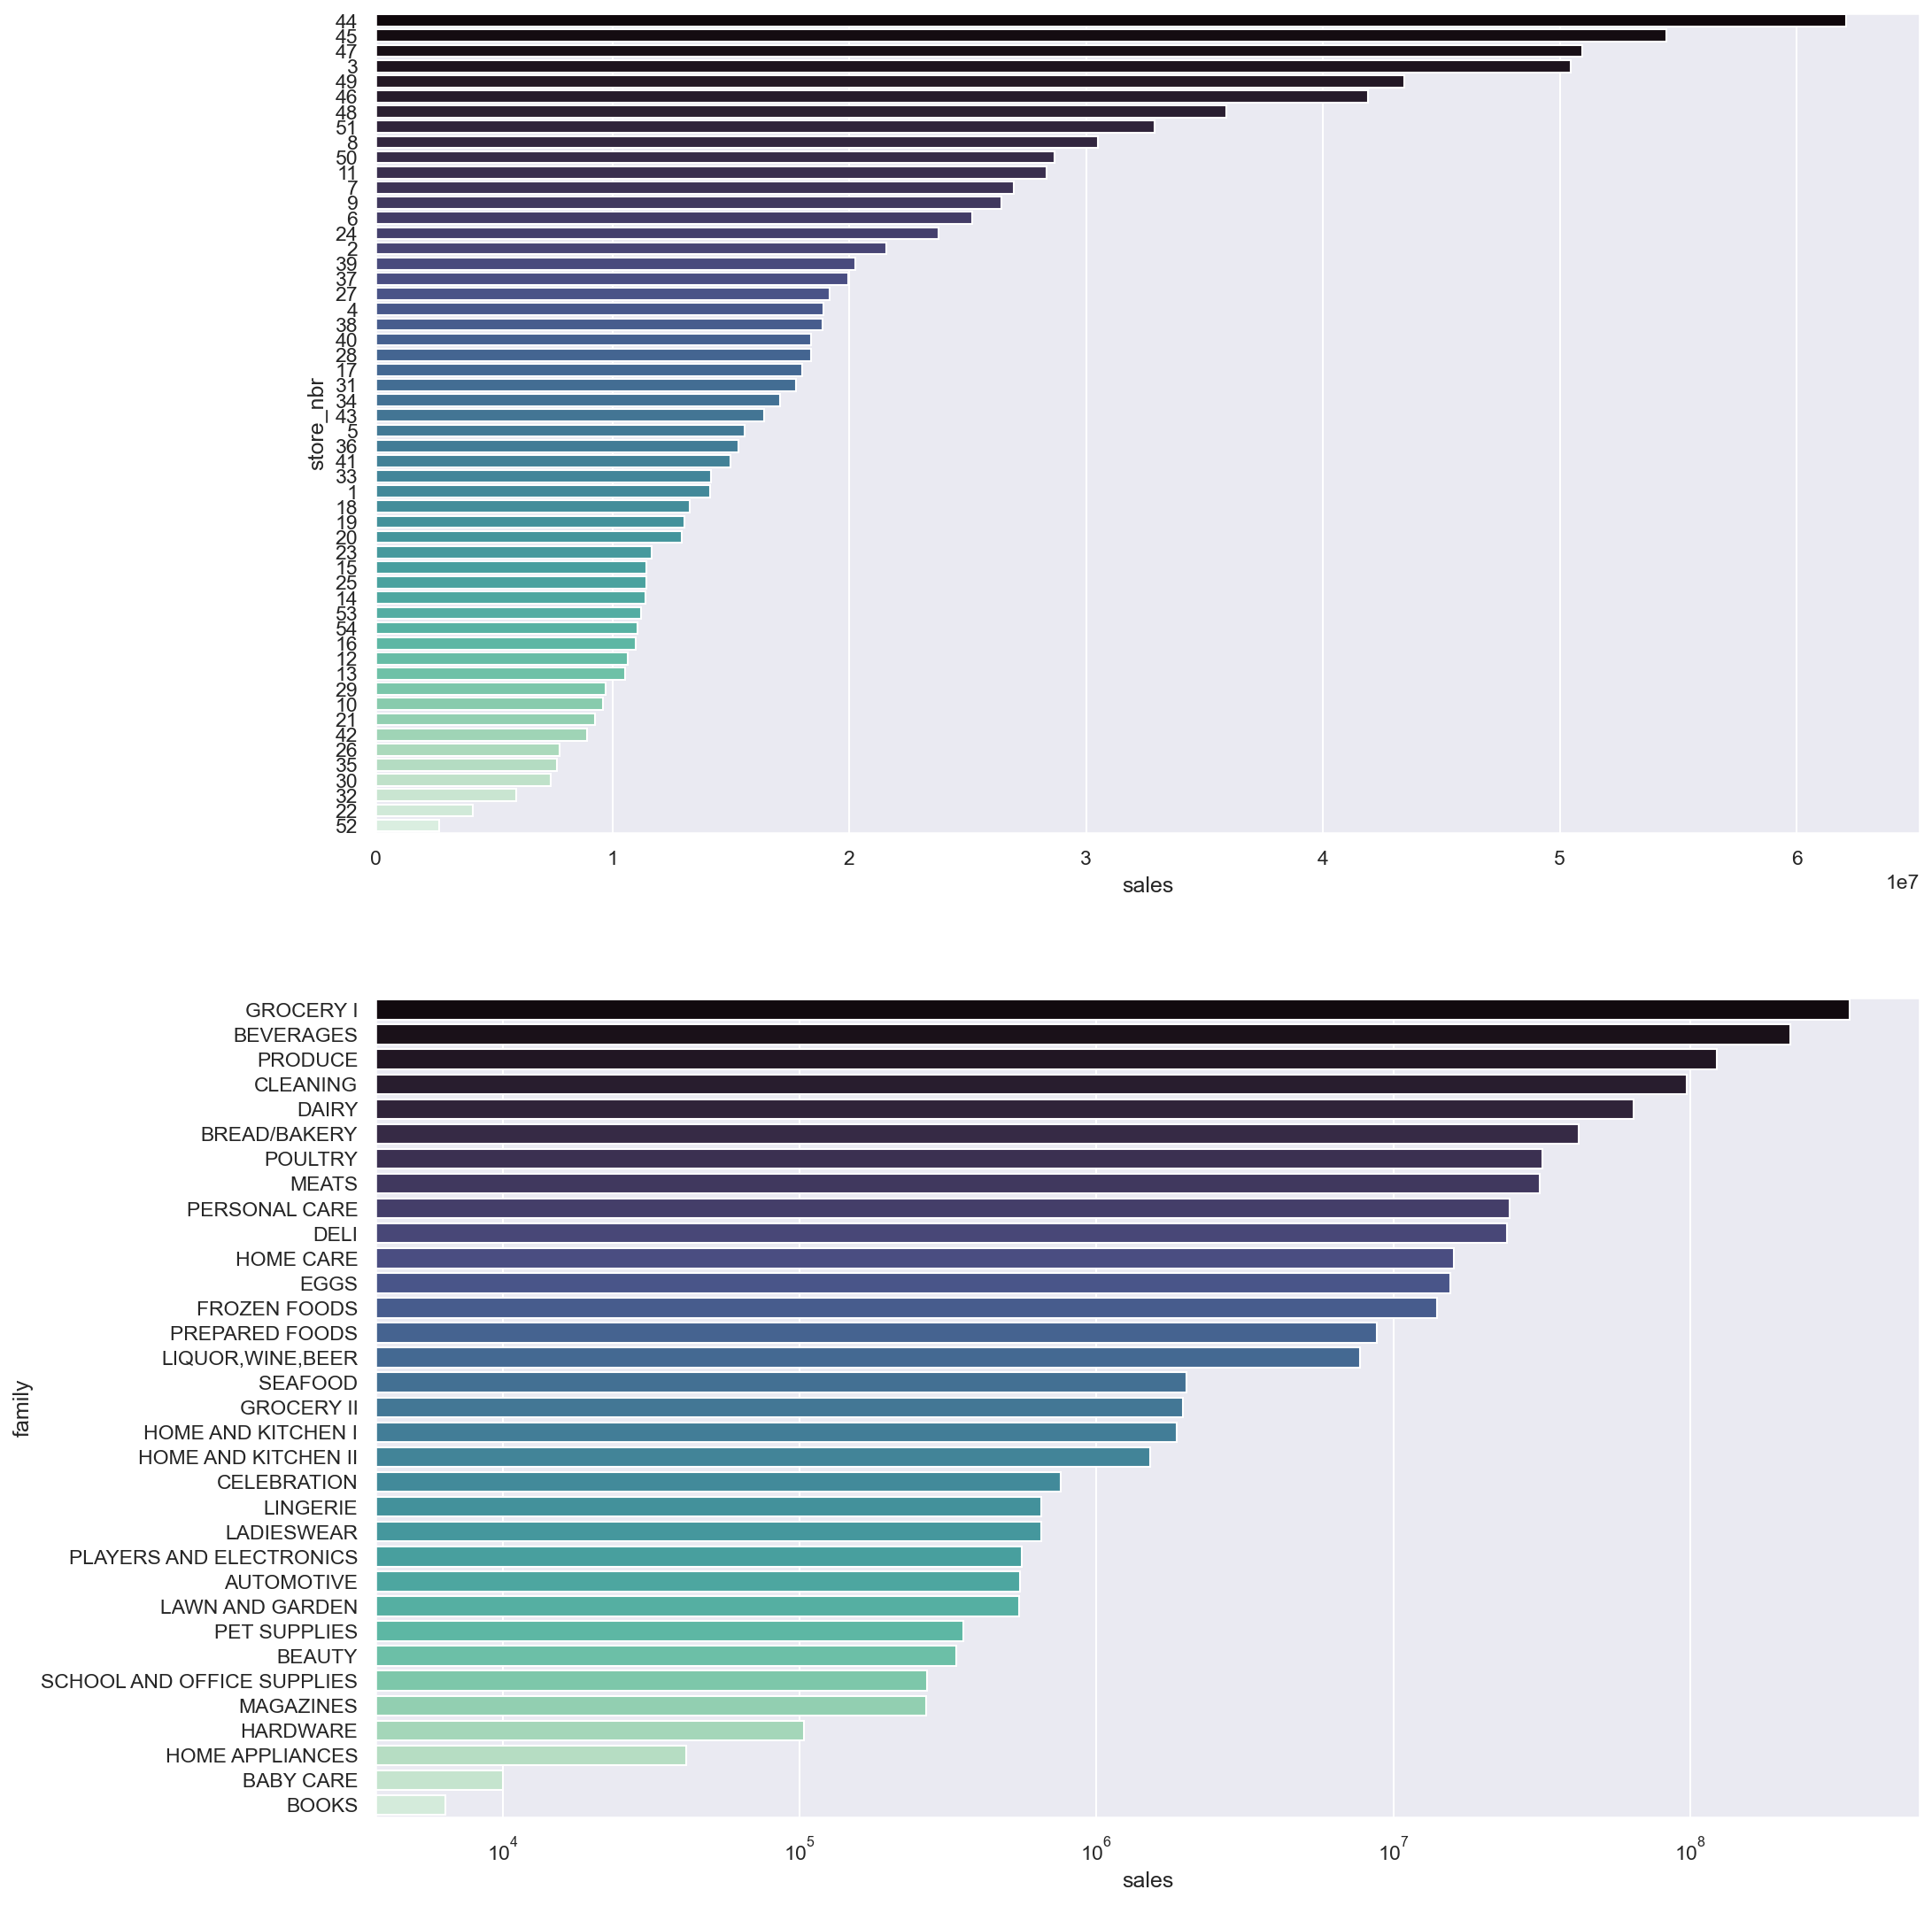

In [41]:
sns.set(rc = {'figure.figsize':(15,18), 'figure.dpi':(150),})
fig, fig1 = plt.subplots(2,1)

sns.barplot(data=sales_per_str,y='store_nbr',x='sales',ax=fig1[0],order=sales_per_str.sort_values('sales',ascending = False).store_nbr,palette='mako')
sns.barplot(data=sales_per_fam,y='family',x='sales',ax=fig1[1],order=sales_per_fam.sort_values('sales',ascending = False).family,palette='mako',).set(xscale="log")

Notar que en el barplot superior se usa escala normal y en el inferior logarítmica. 

In [42]:
sales_per_str_fam.head()

,store_nbr,family,sales
0,1,AUTOMOTIVE,5475.0
1,1,BABY CARE,0.0
2,1,BEAUTY,4056.0
3,1,BEVERAGES,2673769.0
4,1,BOOKS,211.0


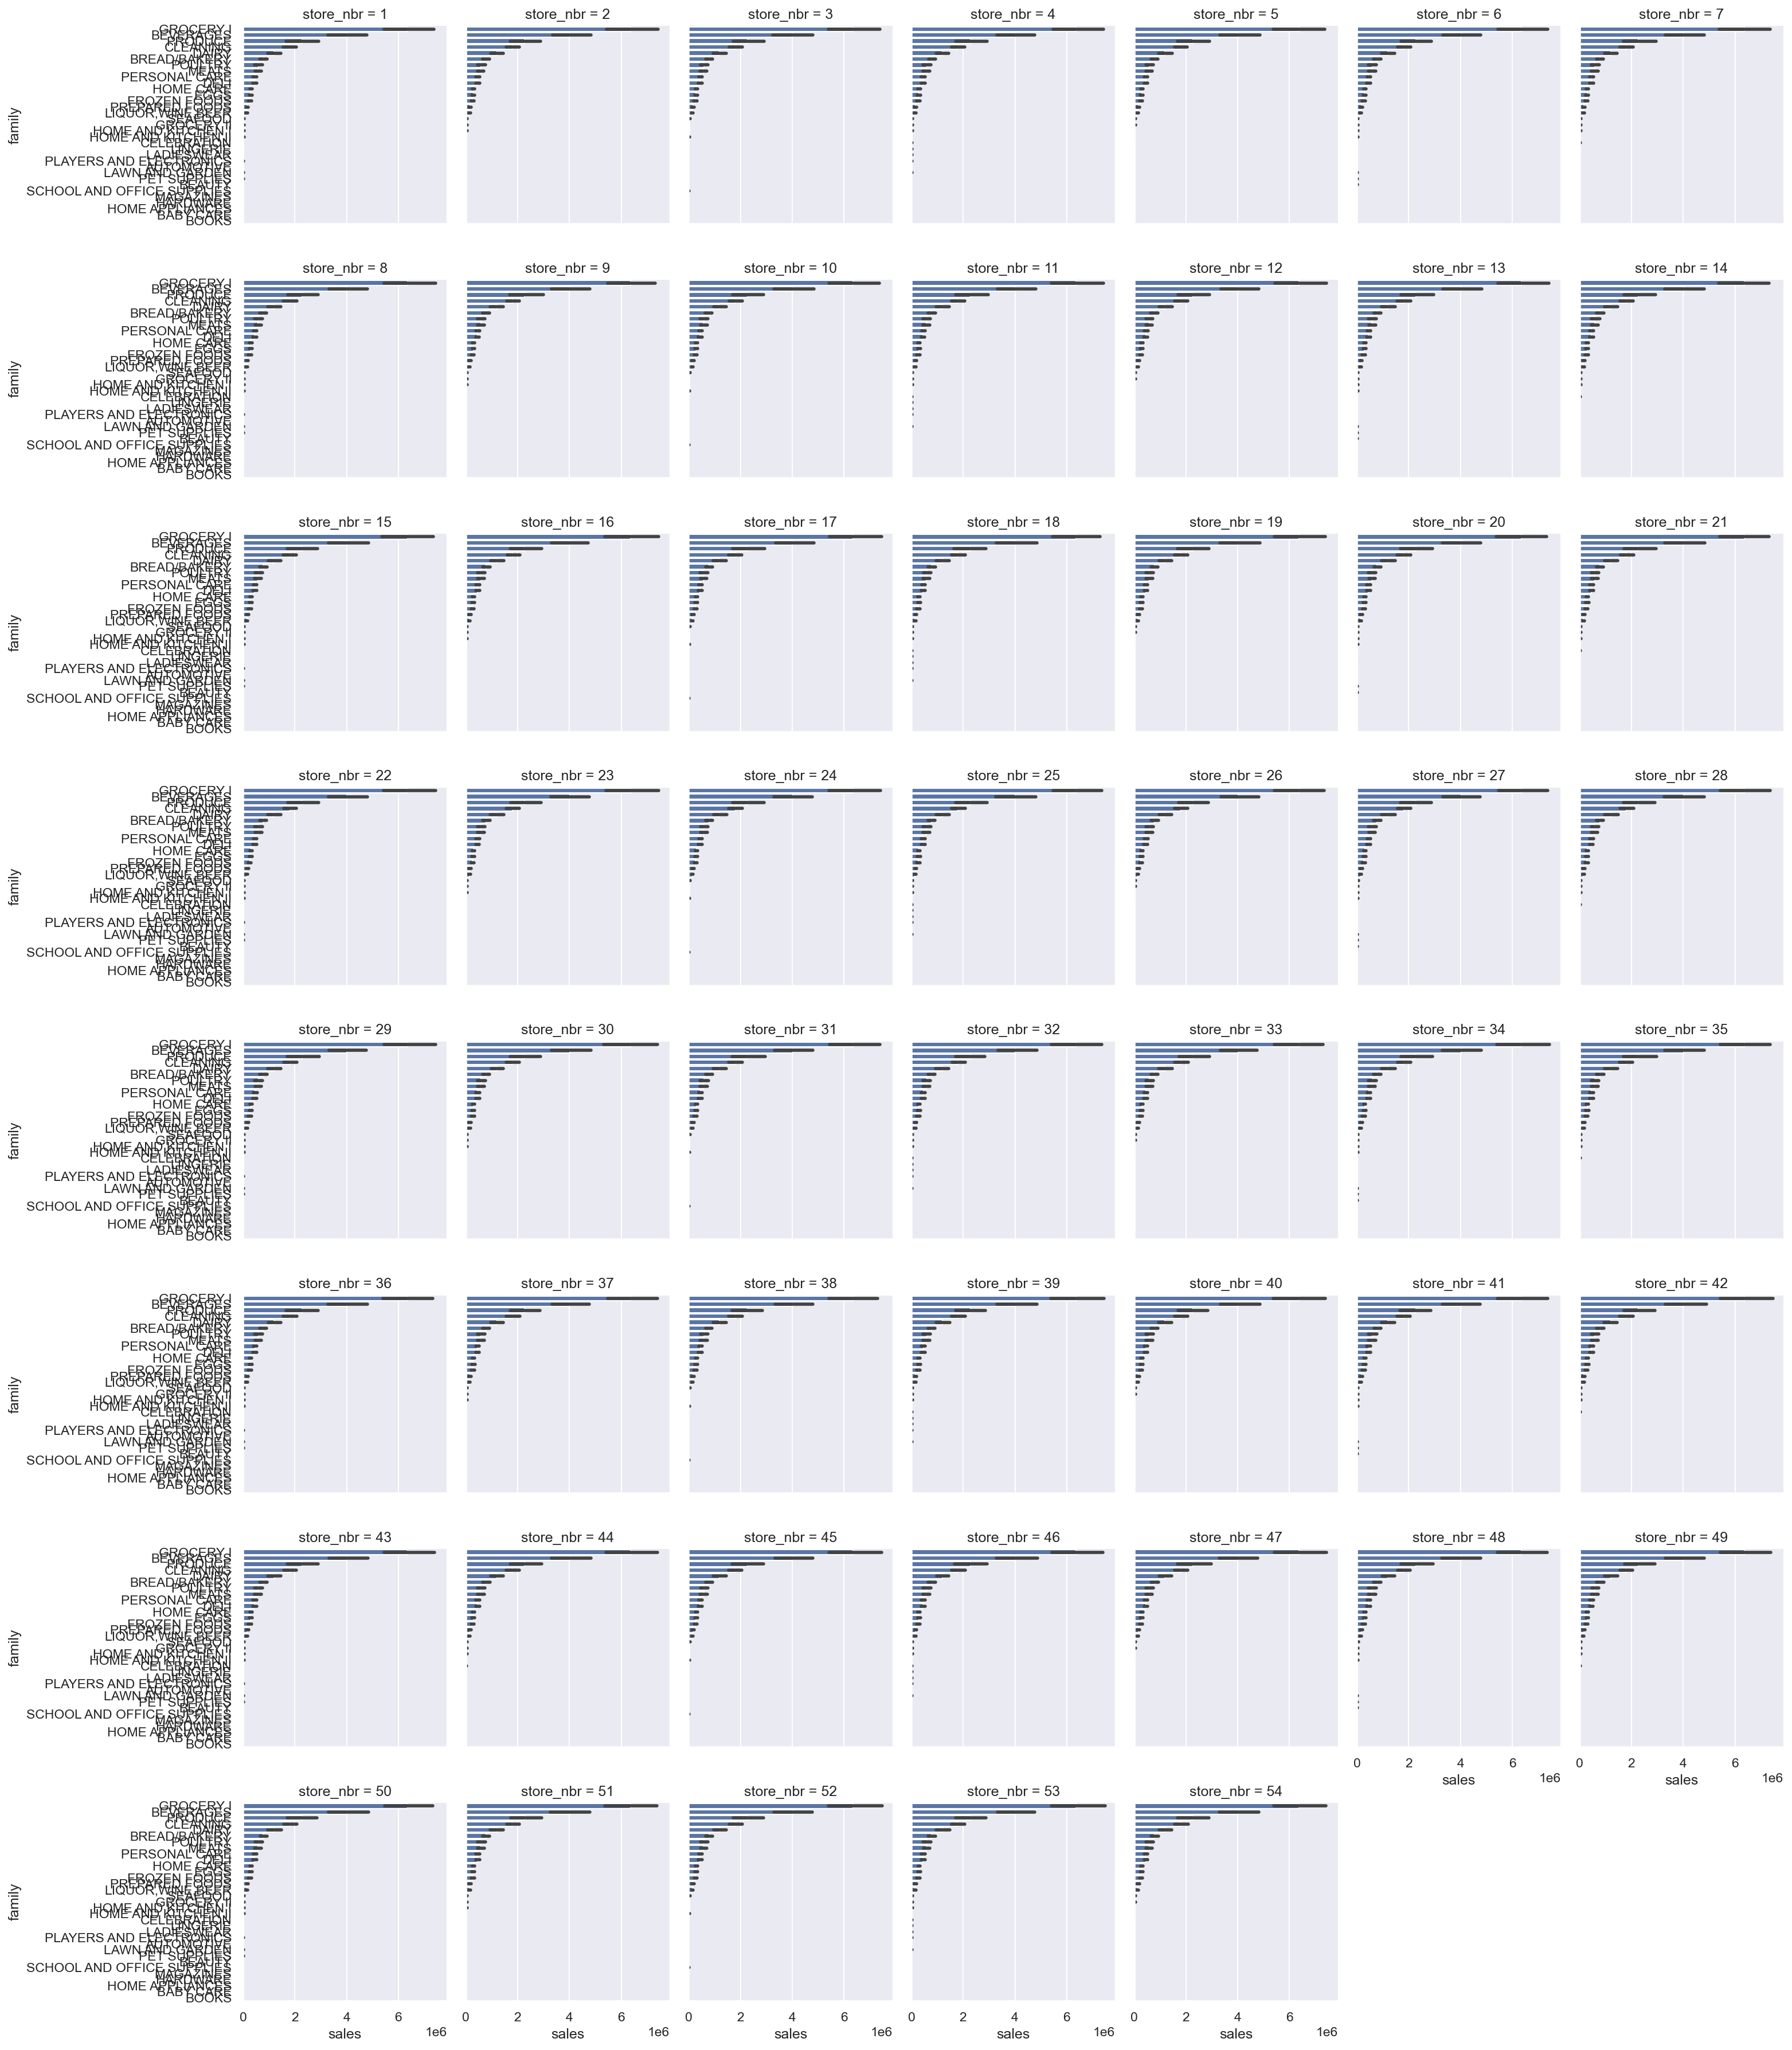

In [48]:
fig2 = sns.FacetGrid(data=sales_per_str_fam,col='store_nbr',col_wrap=7)
fig2.map(sns.barplot,data=sales_per_str_fam,y='family',x='sales',order=sales_per_fam.sort_values('sales',ascending = False).family)

Amén de que es casi imposible de leer, a vuelo de pájaro se advierte que todas las sucursales presentan un desglose similar de ventas según categoría.

# ¿Existe correlación entre el precio del petróleo y la cantidad de ventas a lo largo del tiempo?

In [49]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [79]:
oil['date'] = pd.to_datetime(oil['date'],format='%Y-%m-%d')

In [81]:
train['date'] = pd.to_datetime(train['date'],format='%Y-%m-%d')

In [94]:
sales_oil = train.merge(oil, on='date')
sales_oil_total = sales_oil.drop(columns=['id','store_nbr'])
sales_oil_total = sales_oil_total.groupby(by='date').sum()

In [99]:
sales_oil_per_day = train.groupby(by='date').sum()
sales_oil_per_day = sales_oil_per_day.drop(columns=['id','store_nbr'])
sales_oil_per_day = sales_oil_per_day.merge(oil,on='date')

sales_oil_per_day.head()

,date,sales,onpromotion,dcoilwtico
0,2013-01-01,2511.618999,0,NaN
1,2013-01-02,496092.417944,0,93.14
2,2013-01-03,361461.231124,0,92.97
3,2013-01-04,354459.677093,0,93.12
4,2013-01-07,336122.801066,0,93.20


In [101]:
sales_oil_total.head()

,sales,onpromotion,dcoilwtico
date,,,
2013-01-01,2511.618999,0,0.00
2013-01-02,496092.417944,0,165975.48
2013-01-03,361461.231124,0,165672.54
2013-01-04,354459.677093,0,165939.84
2013-01-07,336122.801066,0,166082.40


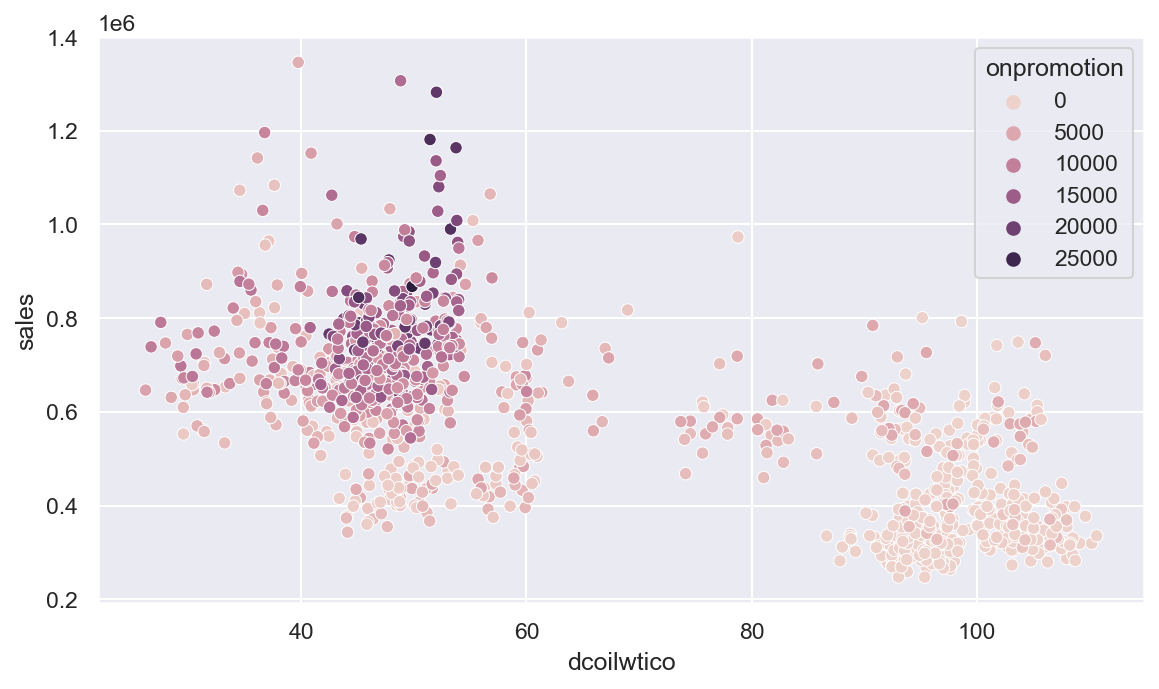

In [107]:
sns.set(rc = {'figure.figsize':(9,5), 'figure.dpi':(150),})
fig3 = sns.scatterplot(data=sales_oil_per_day,x='dcoilwtico',y='sales',hue='onpromotion')

A simple vista, podría intuírse alguna correlación. Es de observar que el valor del petróleo, expresado en *dcoilwtico*, no parece respetar una distribución normal.

## La variable *onpromotion* indica cuántos artículos se encuentran en promoción en un determinado rubro, en una sucursal, en un día. ¿Es cierto que, cuanto mayor sea esta variable, más ventas habrá?

In [91]:
sales_per_day = train.groupby(by='date',as_index=False).sum()
sales_per_day = sales_per_day.drop(columns=['store_nbr','id'])



sales_per_day.head()

,date,sales,onpromotion
0,2013-01-01,2511.618999,0
1,2013-01-02,496092.417944,0
2,2013-01-03,361461.231124,0
3,2013-01-04,354459.677093,0
4,2013-01-05,477350.121229,0


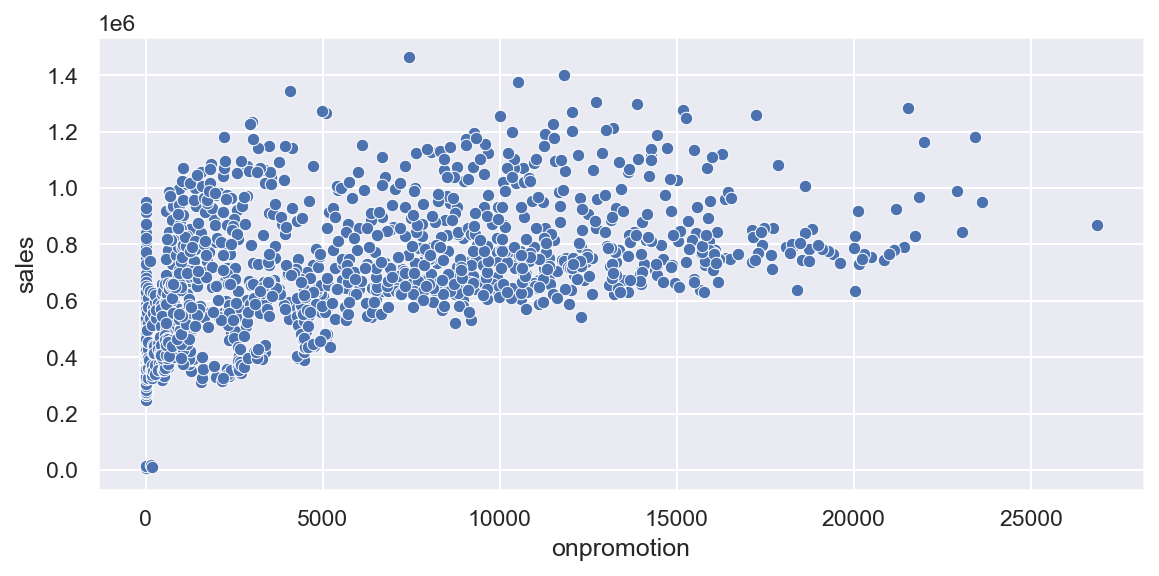

In [109]:
sns.set(rc = {'figure.figsize':(9,4), 'figure.dpi':(150),})

fig4 = sns.scatterplot(data=sales_per_day,x='onpromotion',y='sales')

## ¿Qué información puede aportar una tabla de correlación entre las variables cuantitativas?

Decidí probar diferentes tablas de correlación con las variables *sales*, *onpromotion* y *dcoilwtico*. 

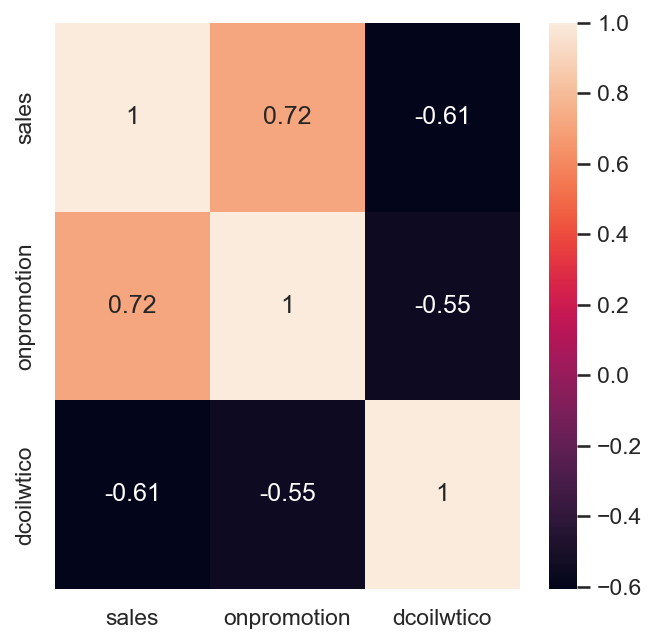

In [104]:
fig5 = sns.heatmap(sales_oil_total.corr(),annot=True)

## ¿Cómo varían ventas y promociones a lo largo de un año?

Durante el workshop de la Clase 37, pude tomarme el tiempo para analizar un cabo suelto: ¿Existe algún patrón en ventas y promociones a lo largo del año? Al haber registros de varios años, se supone menos propenso a estar sesgado. 
Decidí agregar las ventas y promociones totales de todas las sucursales, en todos los rubros. Si bien cabe esperar que algunas categorías experimeneten picos y valles en ventas y promociones a lo largo del año (ej: la categoría *celebraition*), puede ser analizado en detalle en un próximo desafío.

In [110]:
sales_per_dm = sales_per_day
sales_per_dm['date'] = sales_per_dm['date'].dt.strftime('%m-%d')

sales_per_dm.head()

,date,sales,onpromotion
0,01-01,2511.618999,0
1,01-02,496092.417944,0
2,01-03,361461.231124,0
3,01-04,354459.677093,0
4,01-05,477350.121229,0


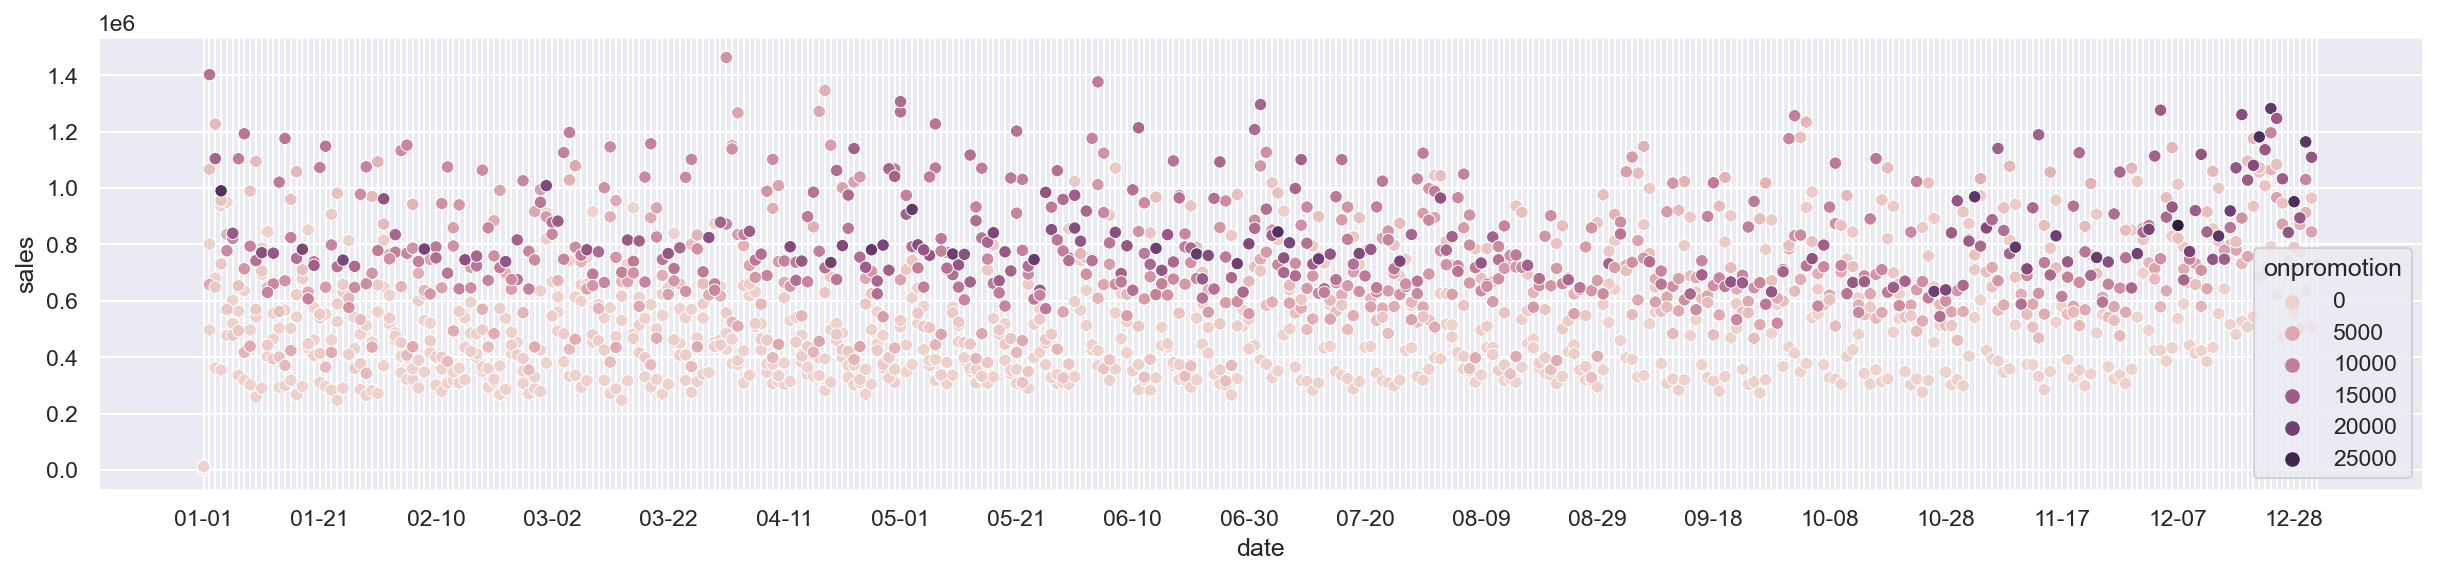

In [115]:
sns.set(rc = {'figure.figsize':(20,4), 'figure.dpi':(150),})
fig6 = sns.scatterplot(data=sales_per_dm,x='date',y='sales',hue='onpromotion')
for index, label in enumerate(fig6.get_xticklabels()):
   if index % 20 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
        

Observar este scatterplot parece abonar la teoría de que existe correlación entre las magnitudes *sales* y *onpromotion*. Se observa un incremento en las ventas en las últimas semanas del año.

In [117]:
sales_per_dm_avg = sales_per_dm.groupby(by='date').mean()

sales_per_dm_avg.head()

,sales,onpromotion
date,,
01-01,10480.639276,68.2
01-02,884770.166332,3718.6
01-03,804425.512675,3629.6
01-04,793612.535712,5190.8
01-05,721835.520258,2729.6


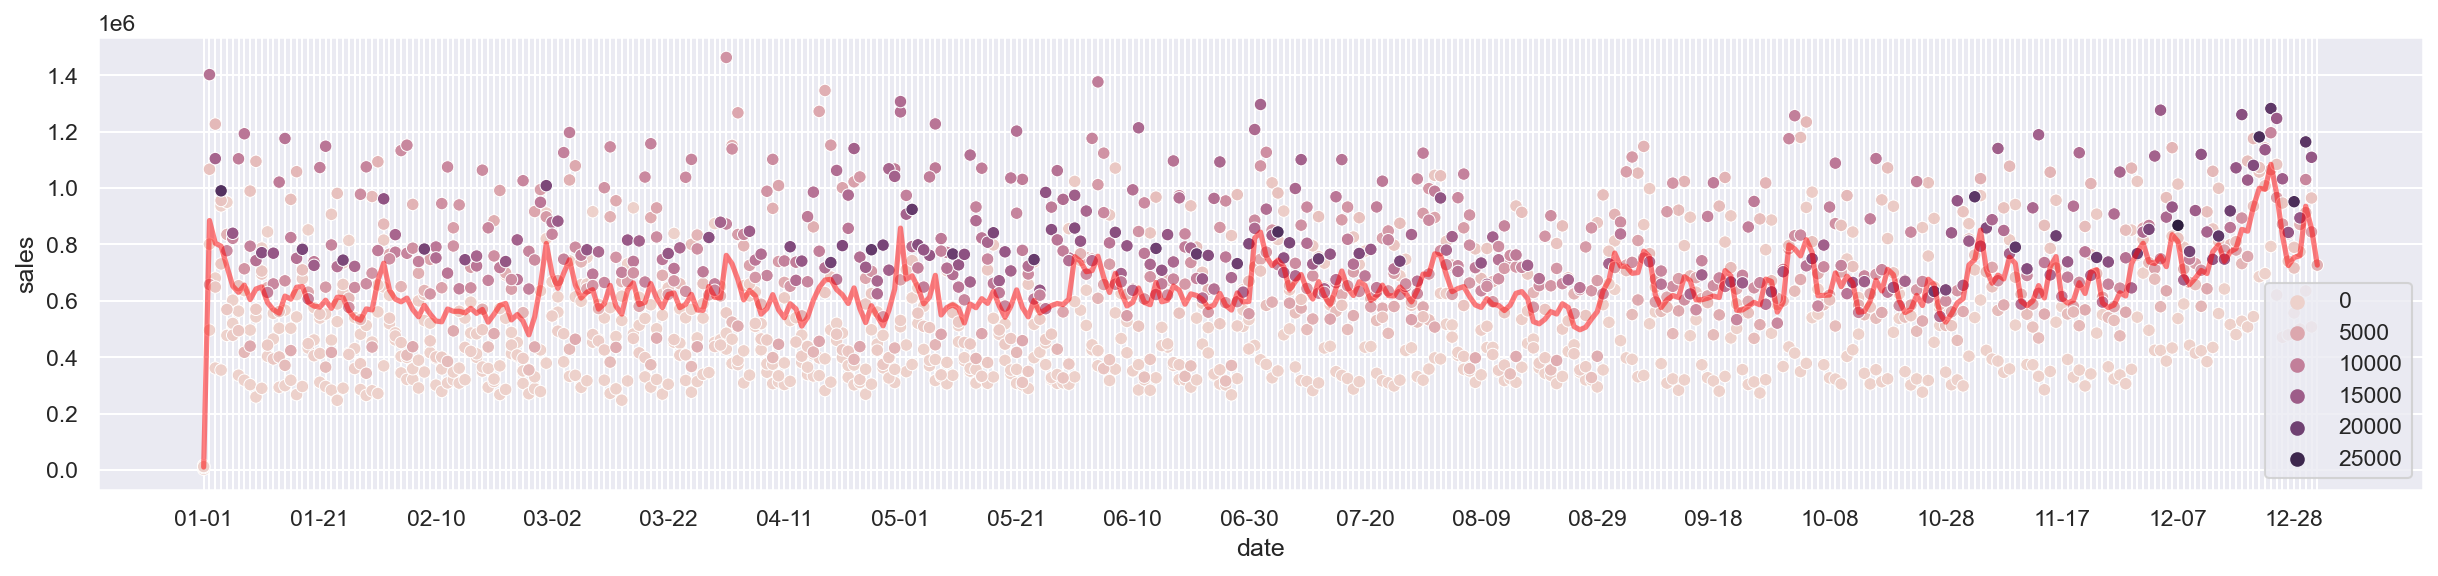

In [121]:
sns.set(rc = {'figure.figsize':(20,4), 'figure.dpi':(150),})
fig6 = sns.scatterplot(data=sales_per_dm,x='date',y='sales',hue='onpromotion')
sns.lineplot(data=sales_per_dm_avg,x='date',y='sales',color='red', linewidth=2.5,alpha=0.5)
for index, label in enumerate(fig6.get_xticklabels()):
   if index % 20 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

Incluyendo una línea con el promedio de *sales* entre los registros de una misma fecha, se observa que las sucursales no trabajan los días 1ro de enero, y se confirma el aumento hacia fin de año.